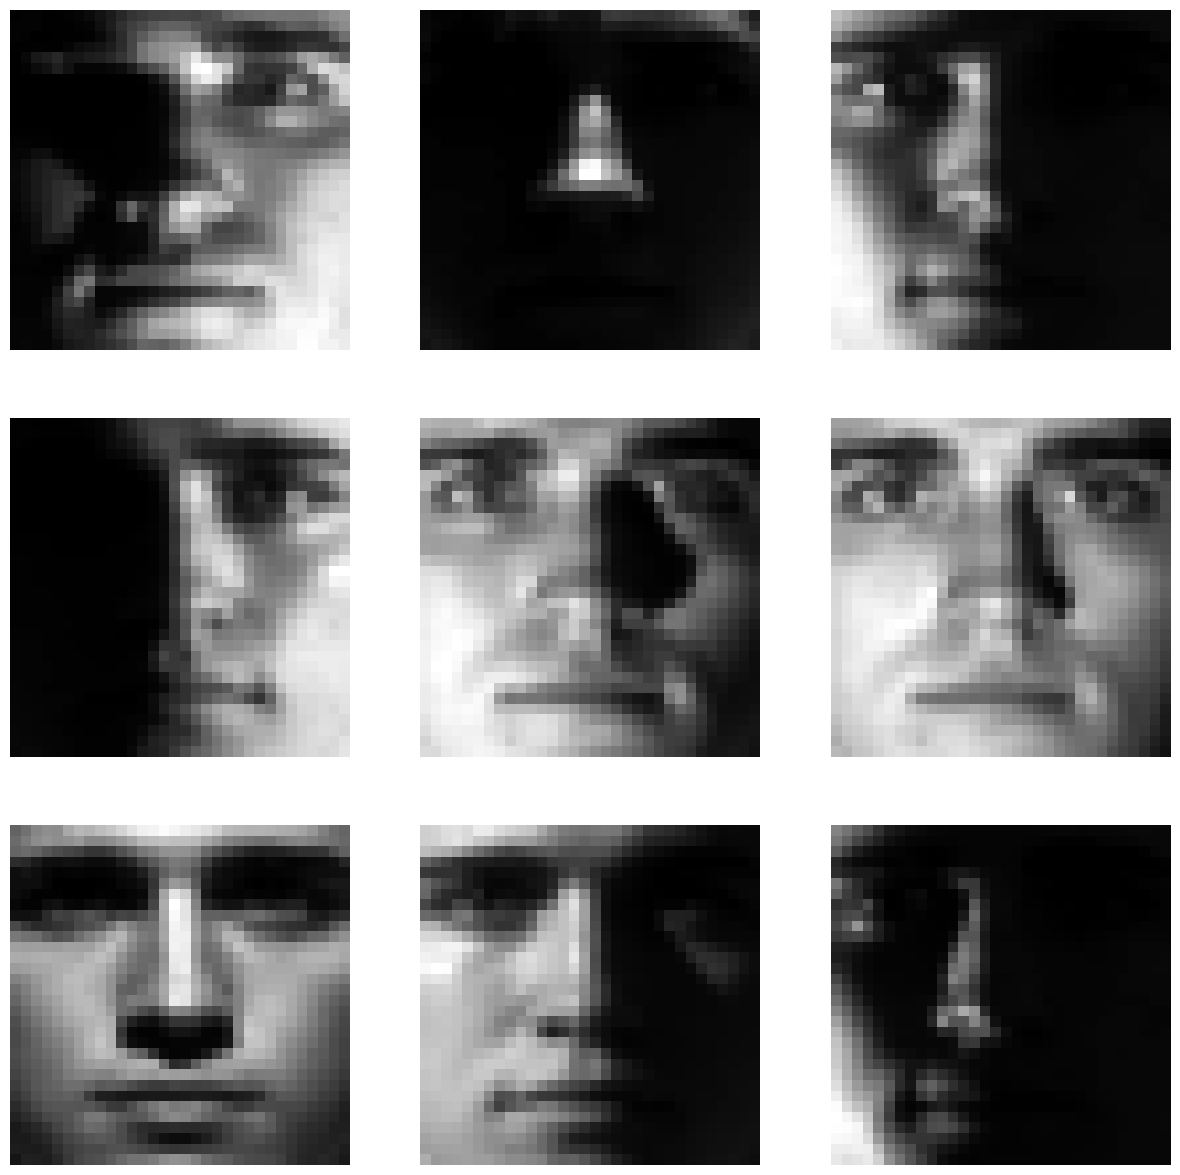

In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
from numpy import linalg 

results=loadmat('yalefaces.mat')
X=results['X']

fig = plt.figure(figsize=(15, 15))
for k in range(9):
    Xp = X[:, k].reshape((32, 32), order='F')
    uplot = Xp.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot, cmap='gray')
    ax.axis('off')

#plt.savefig('AE_yale1.eps', format='eps')
plt.show()

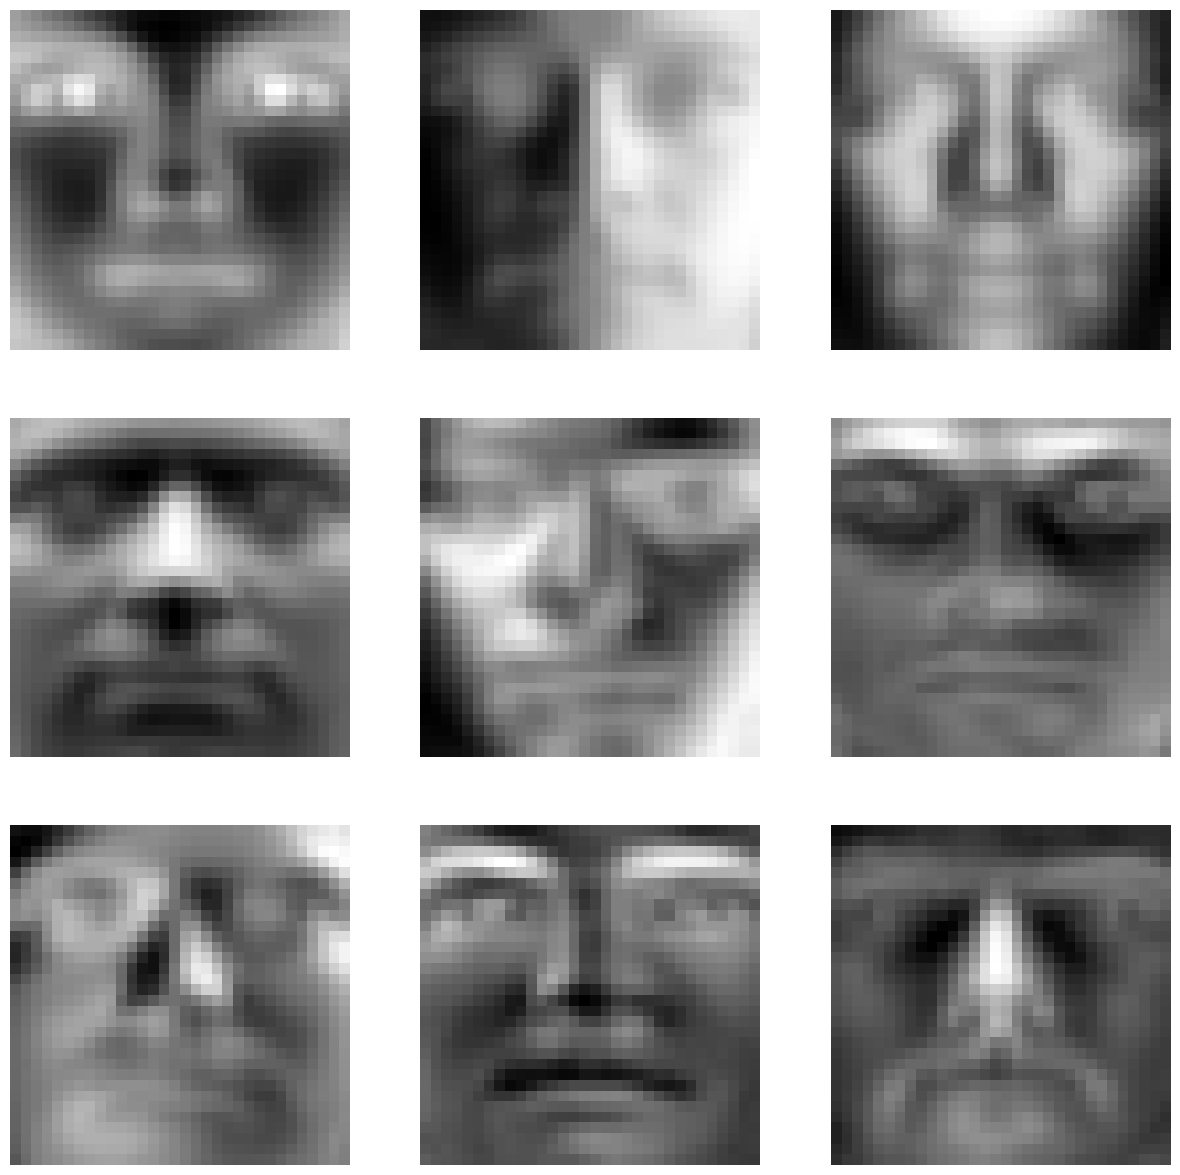

(1024,)
[483.75660704 221.44596474  90.75538495  77.62004546  45.29344801]
(2414, 2414)
2911.732560805223


In [2]:
u,s,v=np.linalg.svd(X)
fig = plt.figure(figsize=(15, 15))
for k in range(9):
    Up = u[:, k].reshape((32, 32), order='F')
    uplot = Up.T
    ax = fig.add_subplot(3, 3, k+1)
    ax.imshow(uplot, cmap='gray')
    ax.axis('off')


#plt.savefig('AE_yale2.eps', format='eps')
plt.show()

print(s.shape)
print(s[0:5])
print(v.shape)
print(np.sum(s))


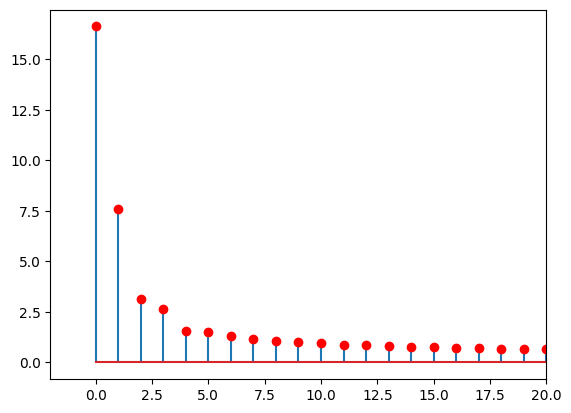

In [3]:
plt.stem(100*s/np.sum(s), markerfmt='ro')
plt.xlim(-2, 20)
plt.show()

In [55]:
[m,n] = X.shape
input_dim = m
r = 20


In [56]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np


In [57]:
class Autoencoder(nn.Module):
    def __init__(self, input_dim, latent_dim):
        super(Autoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, latent_dim),
            nn.ReLU()
        )
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, input_dim),
#            nn.ReLU()  # Using ReLU at the output can be replaced by another activation function or none depending on your data
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [58]:
X2 = (X.T).astype(np.float32)
tensor_X = torch.from_numpy(X2)

dataset = TensorDataset(tensor_X)
dataloader = DataLoader(dataset, batch_size=10, shuffle=True)

In [59]:
# Model initialization
autoencoder = Autoencoder(m, r)
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
loss_function = nn.MSELoss()

# Training loop
num_epochs = 500
for epoch in range(num_epochs):
    for data in dataloader:
        inputs, = data
        optimizer.zero_grad()
        outputs = autoencoder(inputs)
        loss = loss_function(outputs, inputs)
        loss.backward()
        optimizer.step()
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")


Epoch 1, Loss: 0.027438588440418243
Epoch 11, Loss: 0.00402997387573123
Epoch 21, Loss: 0.0042123193852603436
Epoch 31, Loss: 0.0028958392795175314
Epoch 41, Loss: 0.0021545165218412876
Epoch 51, Loss: 0.0028855735436081886
Epoch 61, Loss: 0.002384877996519208
Epoch 71, Loss: 0.002563013229519129
Epoch 81, Loss: 0.0018868573242798448
Epoch 91, Loss: 0.0015828616451472044
Epoch 101, Loss: 0.0023738679010421038
Epoch 111, Loss: 0.0018491796217858791
Epoch 121, Loss: 0.0018763799453154206
Epoch 131, Loss: 0.0019025024957954884
Epoch 141, Loss: 0.0017103927675634623
Epoch 151, Loss: 0.0013207239098846912
Epoch 161, Loss: 0.0013794940896332264
Epoch 171, Loss: 0.0012455786345526576
Epoch 181, Loss: 0.0018799426034092903
Epoch 191, Loss: 0.001742505352012813
Epoch 201, Loss: 0.001958392094820738
Epoch 211, Loss: 0.0016547214472666383
Epoch 221, Loss: 0.0011432840256020427
Epoch 231, Loss: 0.0022402163594961166
Epoch 241, Loss: 0.0016128624556586146
Epoch 251, Loss: 0.0010742919985204935
Epoc

(9, 1024)


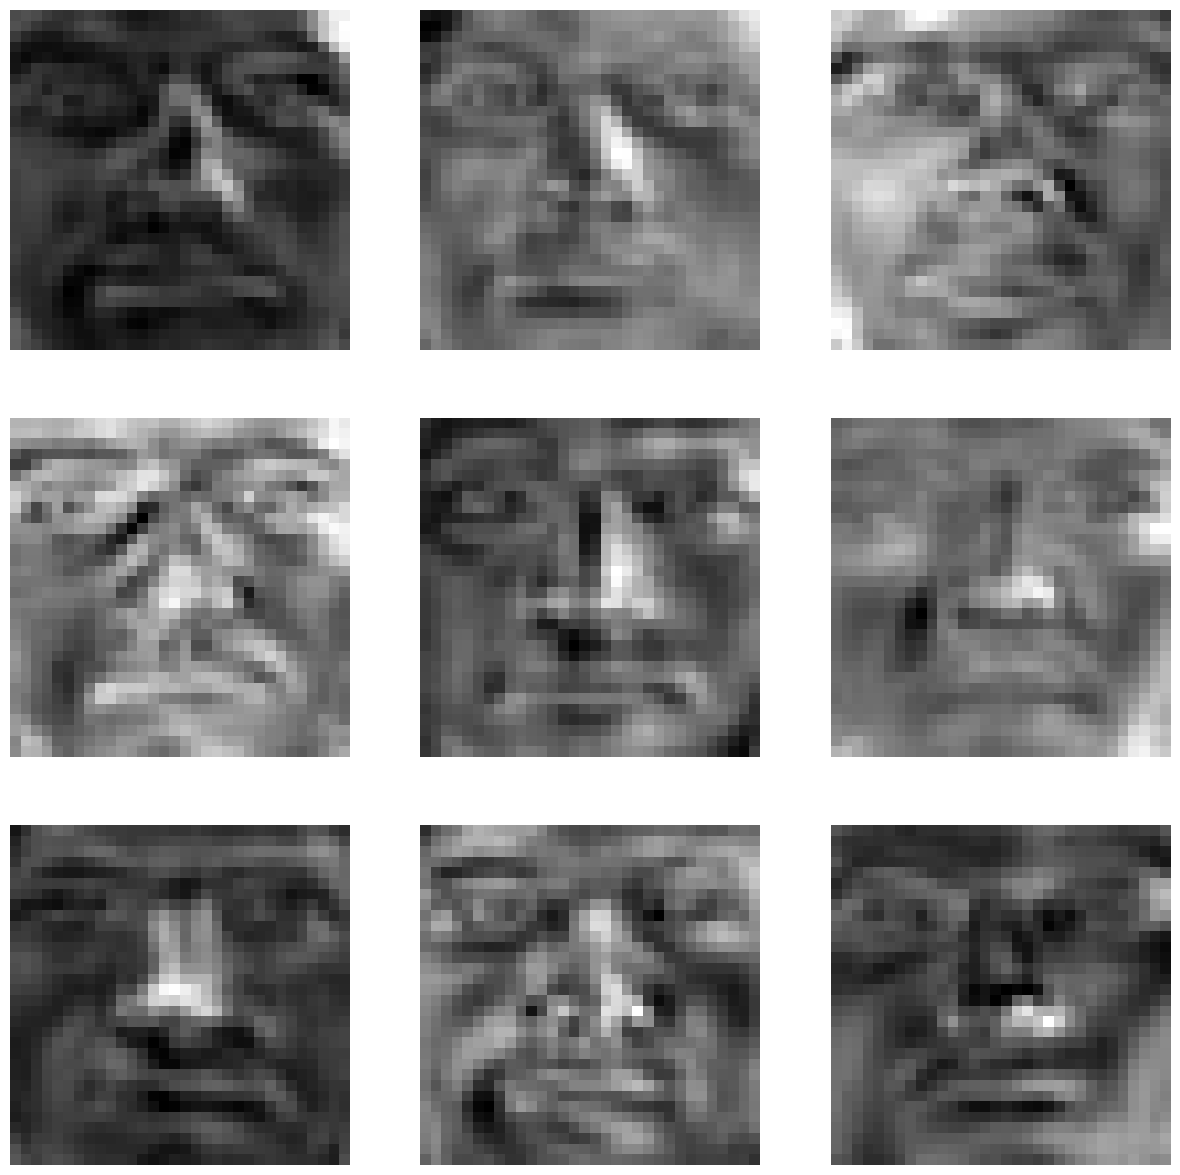

In [64]:
# Generate latent vectors
# Here we use identity matrix to create basis vectors for visualization if r <= 6
latent_vectors = torch.eye(r)
#if r > 9:
#    latent_vectors = latent_vectors[:9]  # Only take first 6 if r is larger than 6
latent_vectors2 = latent_vectors[:9] # pull 9 modes

# Decode latent vectors
decoded = autoencoder.decoder(latent_vectors2).detach().numpy()
print(decoded.shape)

# Plot decoded vectors
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i, ax in enumerate(axes.flatten()):
    if i < r:
        ax.imshow(decoded[i].reshape(32, 32), cmap='gray')
        #ax.set_title(f"Decoded Feature {i+1}")
        ax.axis('off')

plt.savefig('AE_yale3.eps', format='eps')
plt.show()


In [65]:
# decode
encoded = autoencoder.encoder(tensor_X).detach().numpy()


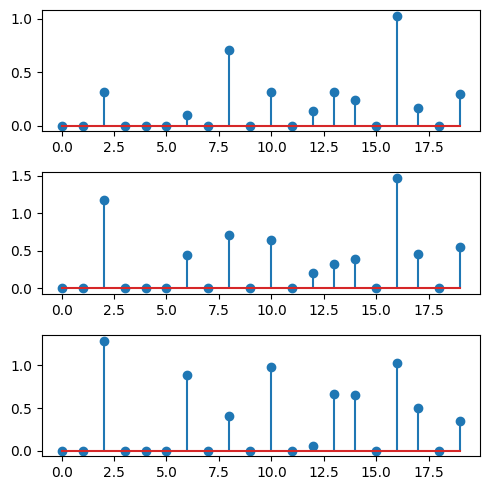

In [66]:
fig, axes = plt.subplots(3, 1, figsize=(5, 5))

# Plotting the first stem plot
axes[0].stem(encoded[0, :])
axes[1].stem(encoded[30, :])
axes[2].stem(encoded[90, :])

plt.tight_layout()

# Show the plot
plt.show()


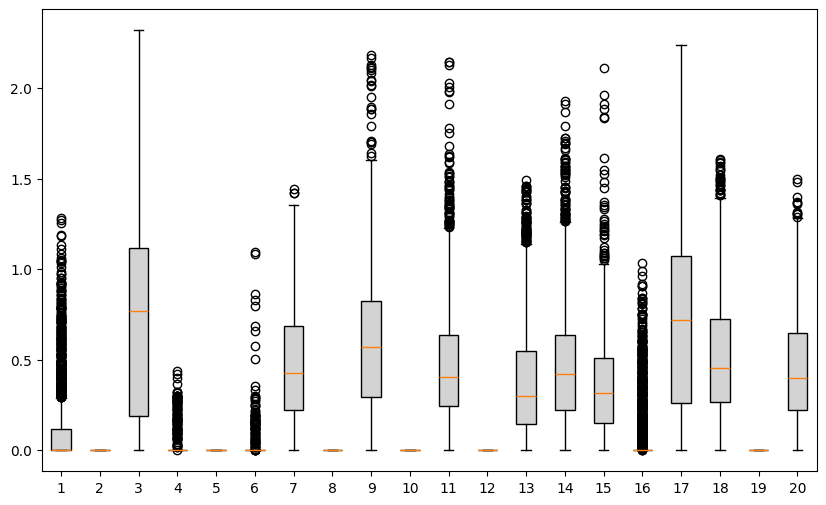

In [67]:
plt.figure(figsize=(10, 6))  
boxplot_elements = plt.boxplot(encoded, patch_artist=True)  # 'patch_artist=True' fills the boxplot for better visibility
for patch in boxplot_elements['boxes']:
    patch.set_facecolor('lightgray')  # set the box fill color to a light gray





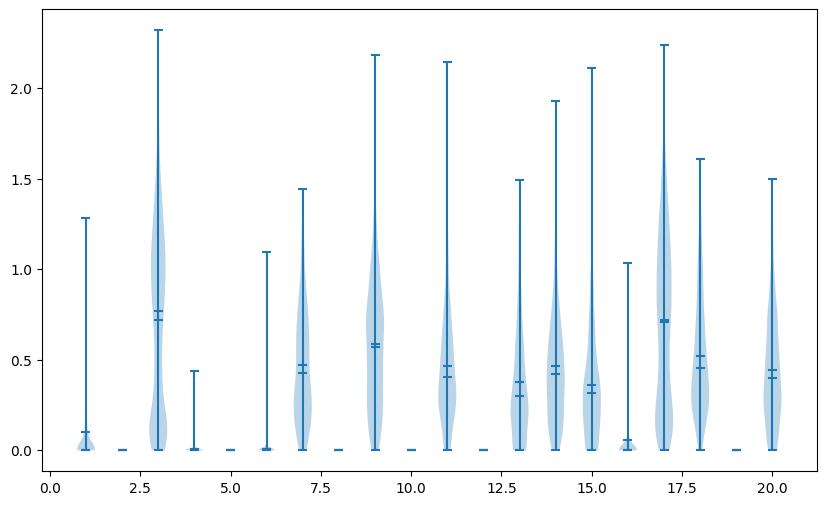

In [68]:

plt.figure(figsize=(10, 6))  
violin_parts = plt.violinplot(encoded, showmeans=True, showmedians=True, showextrema=True)



Epoch 1, Loss: 0.04038761556148529
Epoch 11, Loss: 0.03068394958972931
Epoch 21, Loss: 0.044747550040483475
Epoch 31, Loss: 0.04855360835790634
Epoch 41, Loss: 0.04283512011170387
Epoch 51, Loss: 0.04097779095172882
Epoch 61, Loss: 0.06240779161453247
Epoch 71, Loss: 0.06350236386060715
Epoch 81, Loss: 0.048895061016082764
Epoch 91, Loss: 0.06126145273447037
Epoch 1, Loss: 0.05071963742375374
Epoch 11, Loss: 0.031371891498565674
Epoch 21, Loss: 0.02037747949361801
Epoch 31, Loss: 0.02019616961479187
Epoch 41, Loss: 0.020719284191727638
Epoch 51, Loss: 0.025271642953157425
Epoch 61, Loss: 0.016809314489364624
Epoch 71, Loss: 0.027477417141199112
Epoch 81, Loss: 0.013071076944470406
Epoch 91, Loss: 0.015649786219000816
Epoch 1, Loss: 0.04019272327423096
Epoch 11, Loss: 0.038717612624168396
Epoch 21, Loss: 0.009395577944815159
Epoch 31, Loss: 0.006665353663265705
Epoch 41, Loss: 0.011778153479099274
Epoch 51, Loss: 0.02109018713235855
Epoch 61, Loss: 0.007991787046194077
Epoch 71, Loss: 0

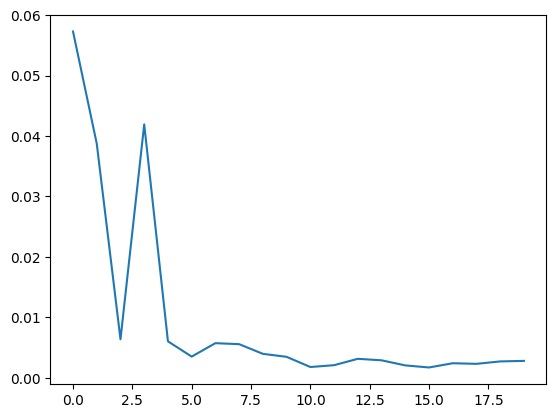

In [39]:

Error=np.zeros(20)
for j in range(20):
    r=j
    # Model initialization
    autoencoder = Autoencoder(m, r)
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)
    loss_function = nn.MSELoss()

    # Training loop
    num_epochs = 100
    for epoch in range(num_epochs):
        for data in dataloader:
            inputs, = data
            optimizer.zero_grad()
            outputs = autoencoder(inputs)
            loss = loss_function(outputs, inputs)
            loss.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}, Loss: {loss.item()}")

    Error[j] = loss.detach().numpy()




The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


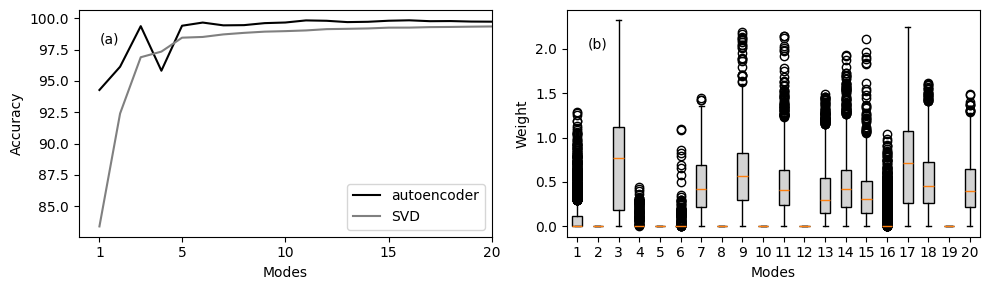

In [88]:


fig, axes = plt.subplots(1, 2, figsize=(10, 3))


modex=np.arange(1,21)
axes[0].plot(modex,100*(1-Error), color='black', label='autoencoder')
axes[0].plot(modex,100*(1-s[:20]/np.sum(s)), color='gray', label='SVD')
axes[0].set_xlim(0, 20)
axes[0].set_xticks([1, 5, 10, 15, 20])
axes[0].set_xlabel('Modes')
axes[0].set_ylabel('Accuracy')
axes[0].legend()
axes[0].text(1, 98, '(a)')


axes[1].boxplot_elements = plt.boxplot(encoded, patch_artist=True)  # 'patch_artist=True' fills the boxplot for better visibility
for patch in axes[1].boxplot_elements['boxes']:
    patch.set_facecolor('lightgray')  # set the box fill color to a light gray

axes[1].set_xlabel('Modes')
axes[1].set_ylabel('Weight')
axes[1].text(1.5, 2, '(b)')

plt.tight_layout()
plt.savefig('AE_yale4.eps', format='eps')
plt.show()
